### 지난 시간?
* beautifulsoup 를 이용한 크롤링
* NLTK 자연어 처리 파이썬 모듈
    * 말뭉치, 문서 확인
    * 형태소 분석
* 형태소 분석
* 토큰화 (문장, 단어..)
* 어간 추출(Stemming)
* 표제어 추출(Lemmatization)
* 품사 태깅
* 데이터 전처리
    * 불용어 제거
    * 정규식 표현
* 워드, 빈도
* 워드 클라우드
* 유의어, 반의어

## 개체명 인식(Named Entity Recognition)
* 이름을 가진 개체(named entity)를 인식 하겠다는 것을 의미
* 예를 들어
    * 2022년 -> 시간
    * 1미터 -> 단위
    * 대한민국 -> 국가
    * 김혜수 -> 배우

In [2]:
# NLTK 에서는 개체명 인식기(NER chunker)
from nltk import word_tokenize, pos_tag, ne_chunk

sentence = "James is working at Disney in London"

# 토큰화 후 품사 태깅
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [3]:
# 개체명 인식
ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# https://nlp.stanford.edu/software/CRF-NER.html#Download

In [12]:
# Stanford Named Entity Recognizer (NER)
# NLTK
from nltk.tag.stanford import StanfordNERTagger

words = word_tokenize(sentence)

jar = '/Users/megan/work/ml-study/text-mining-example/data/stanford-ner-2020-11-17/stanford-ner.jar'
model = '/Users/megan/work/ml-study/text-mining-example/data/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz'

ner_tagger = StanfordNERTagger(model, jar, encoding='utf-8')
print(ner_tagger.tag(words))

[('James', 'PERSON'), ('is', 'O'), ('working', 'O'), ('at', 'O'), ('Disney', 'ORGANIZATION'), ('in', 'O'), ('London', 'LOCATION')]


In [ ]:
# pandas, numpy


### 자연어 처리에서 텍스트를 표현하는 방법이 여러가지
    * BOW(bag of words)
    * DTM(document term matrix)
    * TF-IDF(term frequency-inverse document frequency)
    * Word2Vec

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

paragraph = """The news mentioned here is fake.
Audience do not encourage fake news.
Fake news is false or misleading"""

sentences = nltk.sent_tokenize(paragraph)
print(sentences)
lemmatizer = WordNetLemmatizer()

corpus = []

stopwords = set(stopwords.words('english'))

for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z0-9]', ' ', sentences[i])
    sent = sent.lower()
    sent = sent.split()
    filtered_word = []
    for word in sent:
        if not word in stopwords:
            filtered_word.append(lemmatizer.lemmatize(word))

    sent = ' '.join(filtered_word)
    corpus.append(sent)

# ['news mentioned fake', 'audience encourage fake news', 'fake news false misleading']
print(corpus)

['The news mentioned here is fake.', 'Audience do not encourage fake news.', 'Fake news is false or misleading']
['news mentioned fake', 'audience encourage fake news', 'fake news false misleading']


In [27]:
print(' '.join(corpus))

import collections

word_counter = collections.Counter(' '.join(corpus).split())
print(word_counter)

word_counter = sorted(word_counter.items())
print(word_counter)

news mentioned fake audience encourage fake news fake news false misleading
Counter({'news': 3, 'fake': 3, 'mentioned': 1, 'audience': 1, 'encourage': 1, 'false': 1, 'misleading': 1})
[('audience', 1), ('encourage', 1), ('fake', 3), ('false', 1), ('mentioned', 1), ('misleading', 1), ('news', 3)]


|                              | audience | encourage | fake | false | mentioned | misleading | news |
|------------------------------|----------|-----------|------|-------|-----------|------------|------|
| news mentioned fake          | 0        | 0         | 1    | 0     | 1         | 0          | 1    |
| audience encourage fake news | 1        | 1         | 1    | 0     | 0         | 0          | 1    |
| fake news false misleading   | 0        | 0         | 1    | 1     | 0         | 1          | 1    |

### 사이킷런(scikit-learn)
* 머신러닝 라이브러리
    * https://scikit-learn.org/stable/

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(corpus).toarray()
print(dtm)

[[0 0 1 0 1 0 1]
 [1 1 1 0 0 0 1]
 [0 0 1 1 0 1 1]]


In [34]:
print(cv.get_feature_names_out())

['audience' 'encourage' 'fake' 'false' 'mentioned' 'misleading' 'news']


In [35]:
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = text.lower()

    # tokenize text
    tokens = word_tokenize(text)

    # lemmatize and remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]

    return tokens


In [46]:
exam_docs = ["The first time you see The Second Renaissance it may look boring.",
             "Look at it at least twice and definitely watch part 2.",
             "It will change your view of the matrix",
             "Are the human people the ones who started the war?",
             "Is AI a bad thing?"]

cv = CountVectorizer(tokenizer=tokenize)
dtm = cv.fit_transform(exam_docs).toarray()
print(cv.get_feature_names_out())
print(dtm)

['2' 'ai' 'bad' 'boring' 'change' 'definitely' 'first' 'human' 'least'
 'look' 'matrix' 'may' 'one' 'part' 'people' 'renaissance' 'second' 'see'
 'started' 'thing' 'time' 'twice' 'view' 'war' 'watch']
[[0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [50]:
import pandas as pd
import numpy as np

tdm = pd.DataFrame(dtm)
tdm.columns = cv.get_feature_names_out()
tdm = tdm.T
print(tdm)

             0  1  2  3  4
2            0  1  0  0  0
ai           0  0  0  0  1
bad          0  0  0  0  1
boring       1  0  0  0  0
change       0  0  1  0  0
definitely   0  1  0  0  0
first        1  0  0  0  0
human        0  0  0  1  0
least        0  1  0  0  0
look         1  1  0  0  0
matrix       0  0  1  0  0
may          1  0  0  0  0
one          0  0  0  1  0
part         0  1  0  0  0
people       0  0  0  1  0
renaissance  1  0  0  0  0
second       1  0  0  0  0
see          1  0  0  0  0
started      0  0  0  1  0
thing        0  0  0  0  1
time         1  0  0  0  0
twice        0  1  0  0  0
view         0  0  1  0  0
war          0  0  0  1  0
watch        0  1  0  0  0


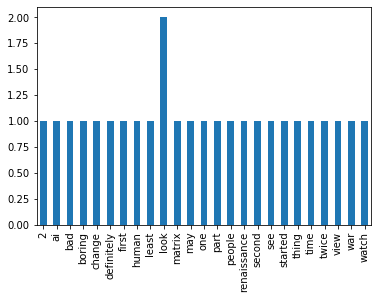

In [52]:
tdm.sum(axis=1).plot.bar()

In [ ]:
# document_term_matrix
# term_document_matrix


### TF-IDF(Term Frequency-Inverse Document Frequency)
* tf(d,t) : 특정 문서 d 에서의 특정 단어 t의 등장 횟수
* df(t) : 특정 단어 t가 등장한 문서의 수
* idf(d, t) : df(t)에 반비례하는 수
    * idf(d, t) = log( n / (1 + df(5))
    * n 은 총 문서의 수
#### TF-IDF 의 문제점
* TF-IDF는 텍스트, 의미 체계, 동시 발생의 위치를 고려하지 않음


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(exam_docs)
print(X)
print(vectorizer.get_feature_names_out())
print(vectorizer.vocabulary_)

  (0, 2)	0.4636932227319092
  (0, 6)	0.3741047724501572
  (0, 10)	0.4636932227319092
  (0, 11)	0.4636932227319092
  (0, 14)	0.4636932227319092
  (1, 18)	0.5233582502695435
  (1, 4)	0.5233582502695435
  (1, 15)	0.5233582502695435
  (1, 6)	0.4222421409859579
  (2, 7)	0.5773502691896258
  (2, 16)	0.5773502691896258
  (2, 3)	0.5773502691896258
  (3, 17)	0.4472135954999579
  (3, 12)	0.4472135954999579
  (3, 8)	0.4472135954999579
  (3, 9)	0.4472135954999579
  (3, 5)	0.4472135954999579
  (4, 13)	0.5773502691896258
  (4, 1)	0.5773502691896258
  (4, 0)	0.5773502691896258
['ai' 'bad' 'boring' 'change' 'definitely' 'human' 'look' 'matrix' 'ones'
 'people' 'renaissance' 'second' 'started' 'thing' 'time' 'twice' 'view'
 'war' 'watch']
{'time': 14, 'second': 11, 'renaissance': 10, 'look': 6, 'boring': 2, 'twice': 15, 'definitely': 4, 'watch': 18, 'change': 3, 'view': 16, 'matrix': 7, 'human': 5, 'people': 9, 'ones': 8, 'started': 12, 'war': 17, 'ai': 0, 'bad': 1, 'thing': 13}


In [68]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

        ai      bad    boring   change  definitely     human      look  \
0  0.00000  0.00000  0.463693  0.00000    0.000000  0.000000  0.374105   
1  0.00000  0.00000  0.000000  0.00000    0.523358  0.000000  0.422242   
2  0.00000  0.00000  0.000000  0.57735    0.000000  0.000000  0.000000   
3  0.00000  0.00000  0.000000  0.00000    0.000000  0.447214  0.000000   
4  0.57735  0.57735  0.000000  0.00000    0.000000  0.000000  0.000000   

    matrix      ones    people  renaissance    second   started    thing  \
0  0.00000  0.000000  0.000000     0.463693  0.463693  0.000000  0.00000   
1  0.00000  0.000000  0.000000     0.000000  0.000000  0.000000  0.00000   
2  0.57735  0.000000  0.000000     0.000000  0.000000  0.000000  0.00000   
3  0.00000  0.447214  0.447214     0.000000  0.000000  0.447214  0.00000   
4  0.00000  0.000000  0.000000     0.000000  0.000000  0.000000  0.57735   

       time     twice     view       war     watch  
0  0.463693  0.000000  0.00000  0.000000  0.0

### word2vec
* word 를 vector 화
* 텍스트를 숫자로 표현하는 방법들...

### 벡터의 유사도
* 코사인 유사도(Cosine Similarity)


In [71]:
import numpy as np
from numpy import dot
from numpy.linalg import norm


def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))


doc0 = df.iloc[0]
# print(doc0)
doc1 = df.iloc[1]
# print(doc1)

print(cos_sim(doc0, doc1))

0.15796280007241903


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(X, X)

print(similarity)

[[1.        0.1579628 0.        0.        0.       ]
 [0.1579628 1.        0.        0.        0.       ]
 [0.        0.        1.        0.        0.       ]
 [0.        0.        0.        1.        0.       ]
 [0.        0.        0.        0.        1.       ]]


### Association Rule
* support
* confidence
* lift

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/Users/megan/work/ml-study/text-mining-example/data/Market_Basket_Optimisation.csv')

print(dataset.head(5))
print(dataset.shape)
print(dataset.iloc[0].values)

transactions = []
for i in range(0, dataset.shape[0]):
    col_cnt = dataset.shape[1]
    row = [str(dataset.iloc[i].values[j]) for j in range(0, col_cnt) if pd.notnull(dataset.iloc[i].values[j])]
    transactions.append(row)

print(transactions[0])
print(transactions[1])

           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN

In [86]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=bb11bdc5eb80b0f7bcaa5c770caa5be0349d29909b7a1f71b8023c01c9a2f94f
  Stored in directory: /Users/megan/Library/Caches/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [87]:
from apyori import apriori

rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)

In [89]:
results = pd.DataFrame(results)
results.head(10)

# support, confidence, lift

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982906..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005867,"[((pasta), (escalope), 0.37288135593220345, 4...."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.016000,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(olive oil, light cream)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(whole wheat pasta, olive oil)",0.008000,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(shrimp, pasta)",0.005067,"[((pasta), (shrimp), 0.3220338983050848, 4.514..."
9,"(milk, spaghetti, avocado)",0.003333,"[((spaghetti, avocado), (milk), 0.416666666666..."


### 감정분석(Sentiment Analysis)
* 긍정, 중립, 부정

In [90]:
import nltk

nltk.download(
    [
        "names",
        "stopwords",
        "state_union",
        "twitter_samples",
        "movie_reviews",
        "averaged_perceptron_tagger",
        "vader_lexicon",
        "vader_lexicon",
    ]
)


[nltk_data] Downloading package names to /Users/megan/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/megan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/megan/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/megan/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/megan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/megan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/megan/nltk_data...
[nltk_data] Downloading pack

True

In [95]:
# To use VADER

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

from nltk.corpus import twitter_samples

tweets = [t.replace("://", "//") for t in twitter_samples.strings()]
print(tweets[0])
print(tweets[1])

print(len(tweets))

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
30000


In [96]:
for t in tweets[:100]:
    print(sia.polarity_scores(t))

{'neg': 0.747, 'neu': 0.253, 'pos': 0.0, 'compound': -0.7096}
{'neg': 0.26, 'neu': 0.58, 'pos': 0.16, 'compound': -0.3425}
{'neg': 0.449, 'neu': 0.551, 'pos': 0.0, 'compound': -0.6908}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.765}
{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.29, 'neu': 0.5, 'pos': 0.21, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.7003}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2724}
{'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.153, 'neu': 0.316, 'pos': 0.532, 'compound': 0.802}
{'neg': 0.679, 'neu': 0.321, 'pos': 0.0, 'compound': -0.7474}
{'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.116, 'neu': 0.763, 'pos': 0.12, 'compound': 0.0258}
{'neg': 0.592, 'neu': 

In [114]:
from nltk.corpus import movie_reviews
from nltk import sent_tokenize
from statistics import mean

print(movie_reviews.fileids()[0])
print(movie_reviews.categories())

print(movie_reviews.fileids(categories=["pos"])[0])

positive_review_ids = movie_reviews.fileids(categories=["pos"])
negative_review_ids = movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids[:10] + negative_review_ids[:10]

for id in all_review_ids:
    text = movie_reviews.raw(id)
    scores = [
        sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)
    ]
    print(mean(scores))


neg/cv000_29416.txt
['neg', 'pos']
pos/cv000_29590.txt
0.011944444444444447
0.014818181818181819
0.21269473684210527
0.09065909090909091
0.06267037037037038
0.14889411764705882
0.052587499999999995
0.175565625
0.029923076923076924
-0.13511428571428571
0.003524999999999998
0.12829285714285713
0.058132
-0.03674347826086957
-0.012442105263157895
-0.1412057142857143
-0.13009285714285715
0.05767142857142857
-0.11697894736842106
0.019444444444444445


In [116]:
!pip install textblob
!pip install afinn

     |████████████████████████████████| 52 kB 3.7 MB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=c91a31fb42f20b5185f6afb0013bc0c1a99ce6c8cc5b5c80623630513aaaacdf
  Stored in directory: /Users/megan/Library/Caches/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [44]:
import pandas as pd
import numpy as np

test_data = pd.read_csv('/Users/megan/work/ml-study/text-mining-example/data/train_data.tsv', sep='\t', header=0)
print(test_data.head(5))

   Id  EssaySet  Score1  Score2  \
0   1         1       1       1   
1   2         1       1       1   
2   3         1       1       1   
3   4         1       0       0   
4   5         1       2       2   

                                           EssayText  
0  Some additional information that we would need...  
1  After reading the expirement, I realized that ...  
2  What you need is more trials, a control set up...  
3  The student should list what rock is better an...  
4  For the students to be able to make a replicat...  


In [ ]:
# classifier
# 차원 축소, 토픽 모델링
# 의미 연결망 분석 (SNA)